Name: Berkay Yıldız

ID: 201104087 

Course: Bil470

## Importing the Dependincies

In [39]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from dt import DecisionTreeClassifier
from tabulate import tabulate
from sklearn.model_selection import learning_curve

# Exploratory Data Analysis (EDA) for IRIS

In [2]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data = iris_data.drop('Id',axis=1)

In [4]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


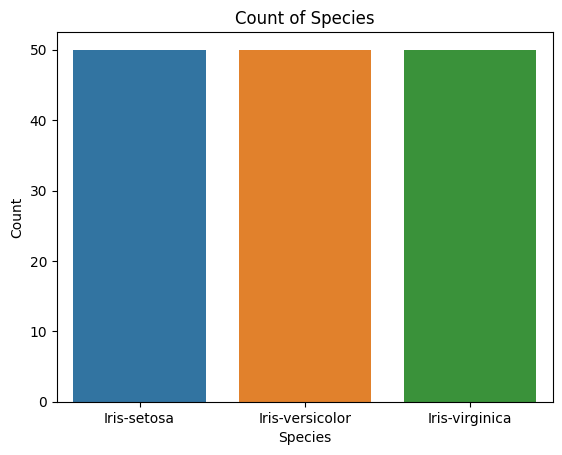

In [5]:
sns.countplot(data=iris_data, x='Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Species')
plt.show()

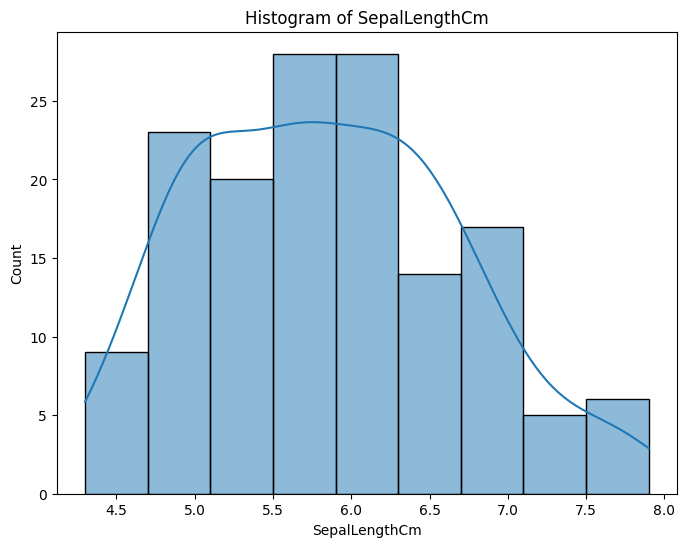

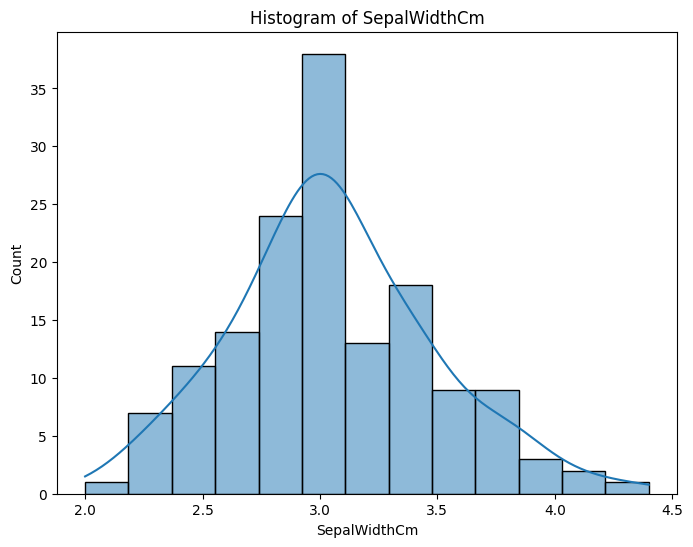

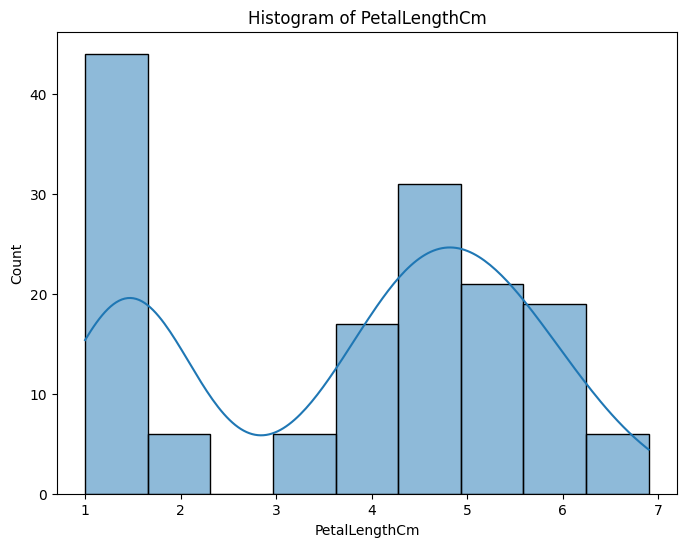

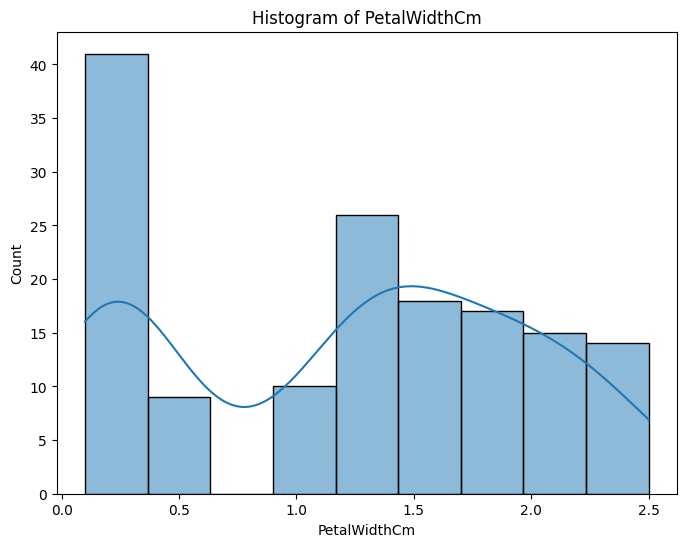

In [6]:
features = iris_data.columns[:-1]

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data= iris_data, x=feature, kde=True) #kde is density
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.show()

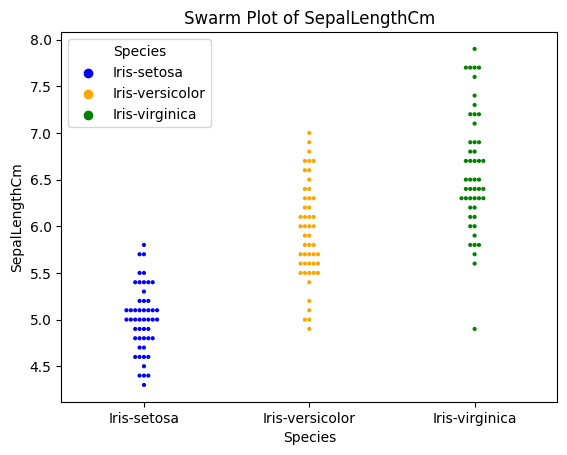

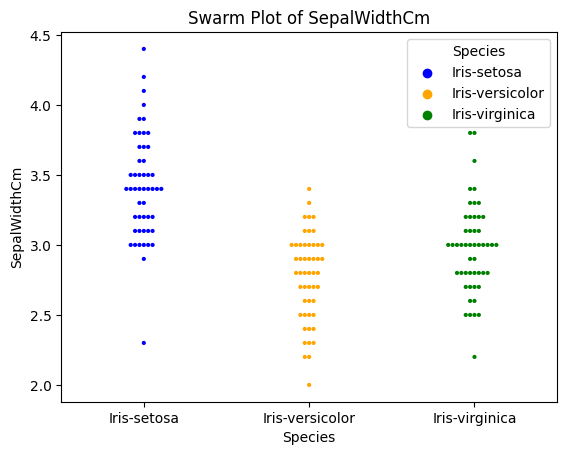

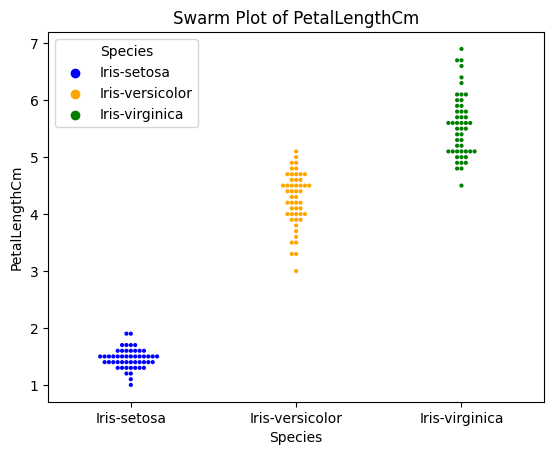

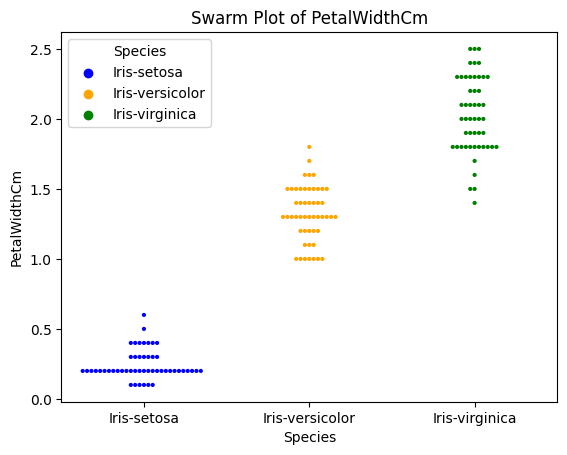

In [7]:
species_colors = {'setosa': 'blue', 'versicolor': 'orange', 'virginica': 'green'}

for feature in features:
    plt.figure()
    sns.swarmplot(data=iris_data, x='Species', y=feature, hue='Species', palette=species_colors.values(), size=3)
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.title(f'Swarm Plot of {feature}')
    plt.show()

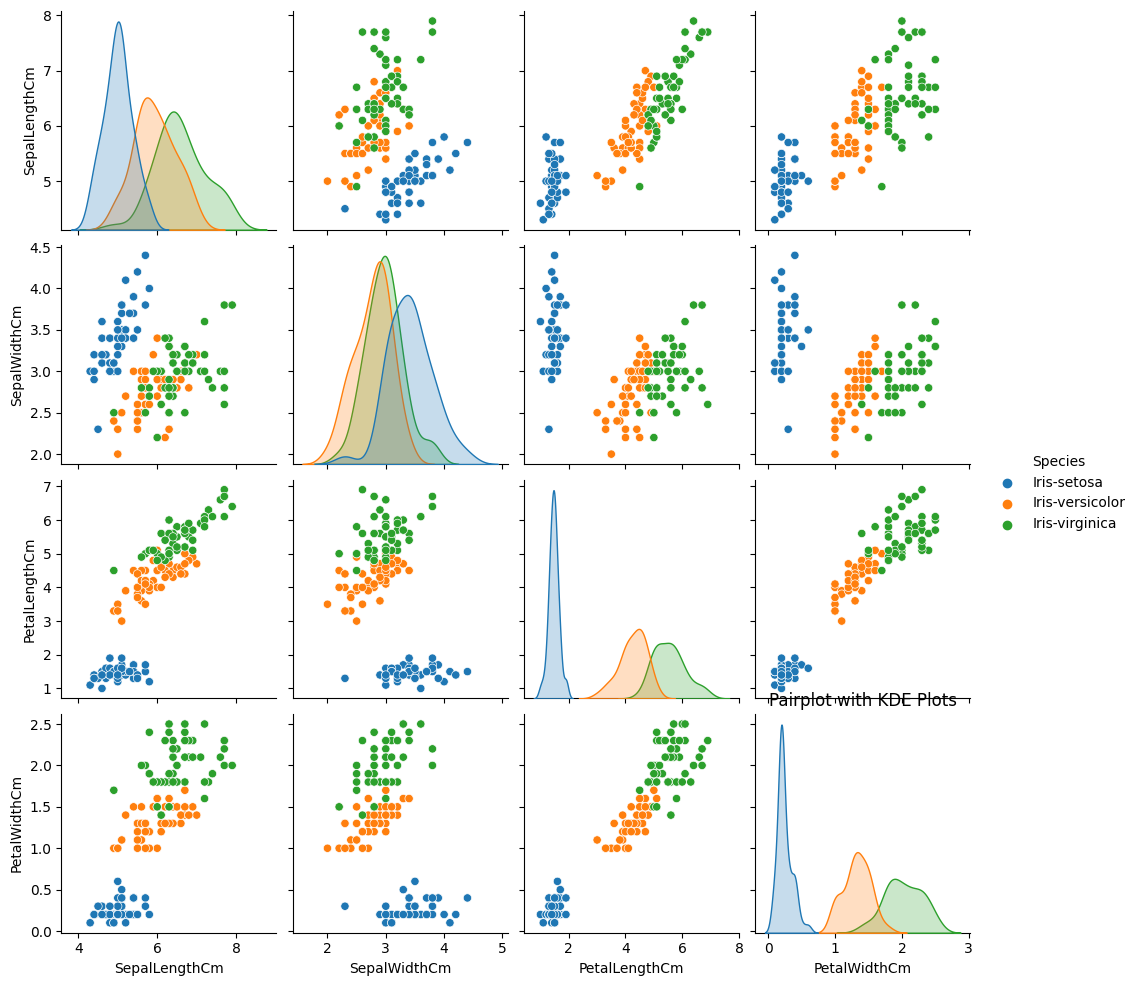

In [8]:
sns.pairplot(data=iris_data, hue='Species', diag_kind='kde')
plt.title('Pairplot with KDE Plots')
plt.show()

C:\Users\Berkay\AppData\Local\Temp\ipykernel_16236\2869641057.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris_data.corr()


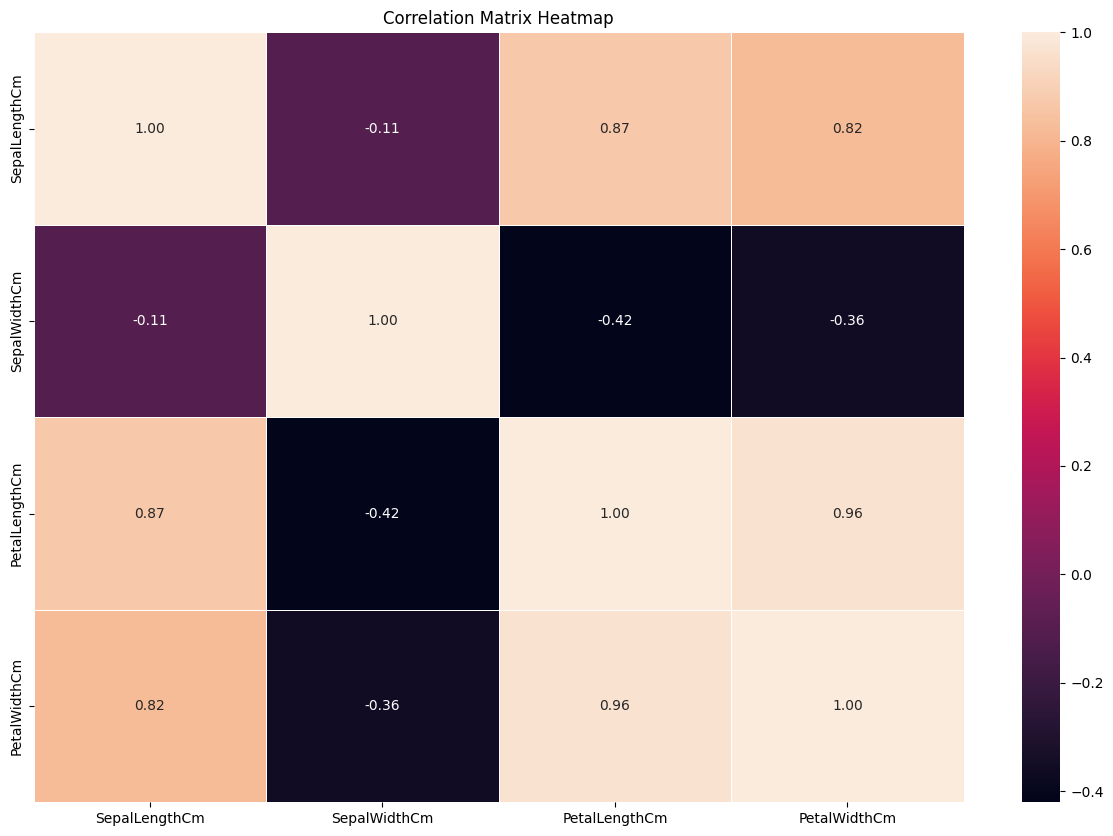

In [9]:
correlation_matrix = iris_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [10]:
labels = LabelEncoder().fit_transform(iris_data.Species)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
iris_data['Target'] = labels

# Train the classifier

In [12]:
clf = DecisionTreeClassifier(max_depth=5)

In [13]:
X = iris_data.drop(['Species','Target'], axis=1)
Y = iris_data['Target']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True)

In [15]:
X_train_list = X_train.values.tolist()
Y_train_list = Y_train.values.tolist()

In [16]:
clf.fit(X_train_list,Y_train_list)

In [17]:
clf.print_tree()

X_2 <= 1.9 ? 0.32464769647696473
 left:0
 right:X_3 <= 1.7 ? 0.3870826209910089
  left:X_2 <= 4.9 ? 0.06530864197530856
    left:X_3 <= 1.6 ? 0.04875000000000007
        left:1
        right:2
    right:X_3 <= 1.5 ? 0.21333333333333332
        left:2
        right:X_0 <= 6.7 ? 0.4444444444444444
                left:1
                right:2
  right:X_2 <= 4.8 ? 0.016557097638178662
    left:X_0 <= 5.9 ? 0.4444444444444444
        left:1
        right:2
    right:2


### Predict Class of Train values

In [18]:
print(Y_train.values.tolist())
predictOfTrain = clf.predict(X_train.values.tolist())
print(predictOfTrain)

[1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1]
[1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1]


In [19]:
differences = [y_true != y_pred for y_true, y_pred in zip(Y_train, predictOfTrain)]
difference_rate = sum(differences) / len(Y_train)
print(difference_rate)

0.0


### Predict Class of Test values

In [20]:
print(Y_test.values.tolist())
predictOfTest = clf.predict(X_test.values.tolist())
print(predictOfTest)

[0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0]
[0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0]


In [21]:
differences = [y_true != y_pred for y_true, y_pred in zip(Y_test, predictOfTest)]
difference_rate = sum(differences) / len(Y_train)
print(difference_rate)

0.0


# Results

### Confusion Matrix of Test

In [22]:
cm = confusion_matrix(Y_test.values.tolist(), predictOfTest)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]


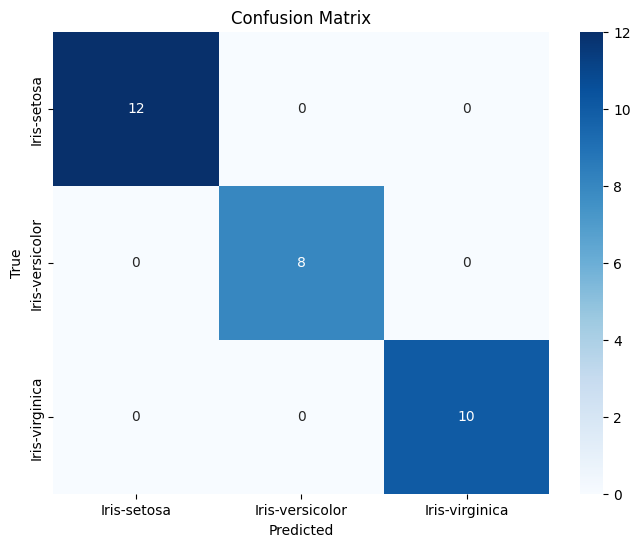

In [23]:
class_labels = list(LabelEncoder().fit(iris_data.Species).classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix of Train

In [24]:
cm = confusion_matrix(Y_train.values.tolist(), predictOfTrain)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[38  0  0]
 [ 0 42  0]
 [ 0  0 40]]


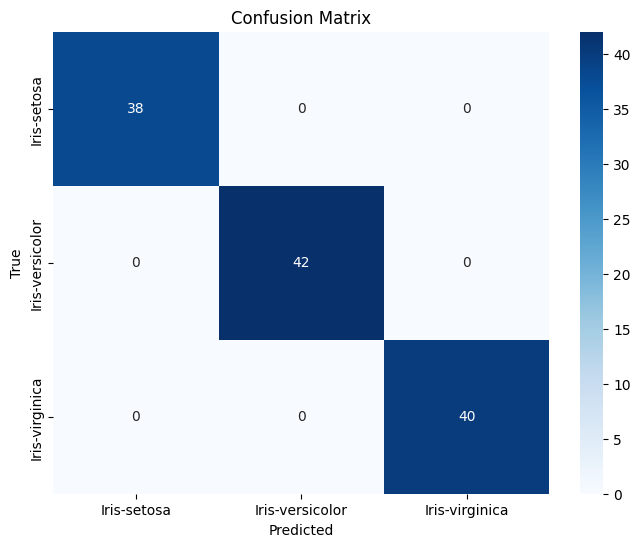

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### F1-Score

In [26]:
report = classification_report(Y_train.values.tolist(), predictOfTrain, target_names=class_labels, digits=3)

print("Classification Report:")
print("-" * 60)
print(report)

Classification Report:
------------------------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        38
Iris-versicolor      1.000     1.000     1.000        42
 Iris-virginica      1.000     1.000     1.000        40

       accuracy                          1.000       120
      macro avg      1.000     1.000     1.000       120
   weighted avg      1.000     1.000     1.000       120



### F1-Score,Precision,Recall and Accuracy of Train

In [27]:
precision, recall, f1, support = precision_recall_fscore_support(Y_train, predictOfTrain, average=None)
accuracy = accuracy_score(Y_train, predictOfTrain)

for i, label in enumerate(class_labels):
    print(f"Class: {label}")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1-Score: {f1[i]:.2f}")
    print("")

print(f"Overall Accuracy: {accuracy:.2f}")

Class: Iris-setosa
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Class: Iris-versicolor
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Class: Iris-virginica
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Overall Accuracy: 1.00


### F1-Score,Precision,Recall and Accuracy of Train

In [28]:
precision, recall, f1, support = precision_recall_fscore_support(Y_test, predictOfTest, average=None)
accuracy = accuracy_score(Y_train, predictOfTrain)

for i, label in enumerate(class_labels):
    print(f"Class: {label}")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1-Score: {f1[i]:.2f}")
    print("")

print(f"Overall Accuracy: {accuracy:.2f}")

Class: Iris-setosa
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Class: Iris-versicolor
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Class: Iris-virginica
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Overall Accuracy: 1.00


### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

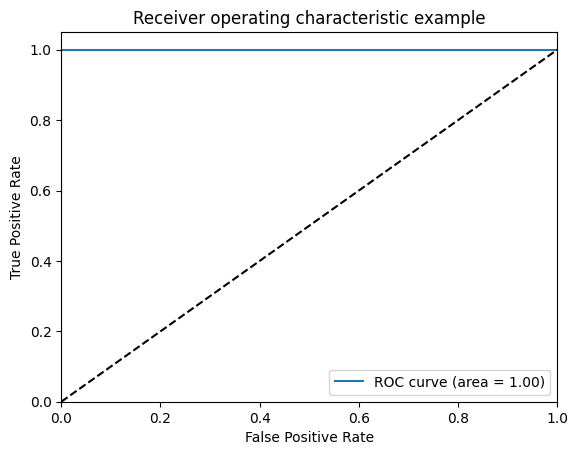

In [29]:
y = label_binarize(pd.Series(Y_test.values.tolist()), classes=[0, 1, 2])
y2 = label_binarize(pd.Series(predictOfTest), classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
 fpr[i], tpr[i], _ = roc_curve(y[:, i], y2[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


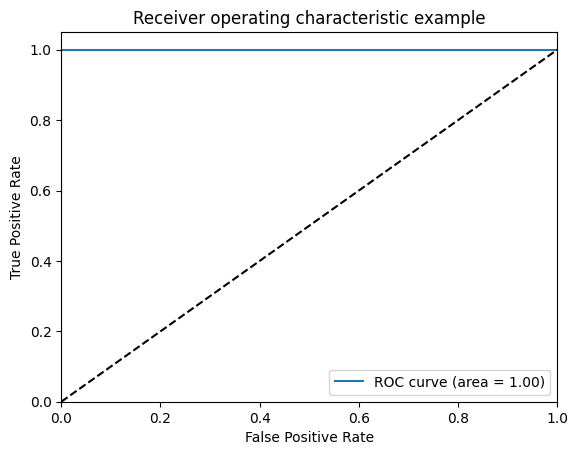

In [30]:
y = label_binarize(pd.Series(Y_train.values.tolist()), classes=[0, 1, 2])
y2 = label_binarize(pd.Series(predictOfTrain), classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
 fpr[i], tpr[i], _ = roc_curve(y[:, i], y2[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### Evaluation

Kendi yazdığım karar ağacı modelinin üzerinden eğittiğim iris data seti test ve train verileri üzerinde hatasız çalışmıştır. Bu hatasız çalışmanın sebepleri arasında verinin kolayca ayırt edilebilen özelliklere sahip olması ve yüksek performans elde etmek mümkün olması, train veri setinin overfitlenmiş olabilmesi ve test veri setinin çok büyük olmaması sonucu ayırt edilememiş olması veya modelin bu eğitimde tam doğru noktalardan karar ağacını ayırması olabilir.

#### Ideal Depth for DT

Kendi modelimdeki derinlik 5, bu değeri öylesine seçmiştim fakat aşağıdaki grafikte de görüldüğü üzere ideal derinlik 2 çıktı. Grafiğe bakıldığında görebileceğimiz gibi derinlik 2'den sonra daima aynı. Bu gibi durumlarda (aynı performansı gösteren) en basit modeli seçmek en mantıklıdır.  

In [34]:
clf.print_tree()

X_2 <= 1.9 ? 0.32464769647696473
 left:0
 right:X_3 <= 1.7 ? 0.3870826209910089
  left:X_2 <= 4.9 ? 0.06530864197530856
    left:X_3 <= 1.6 ? 0.04875000000000007
        left:1
        right:2
    right:X_3 <= 1.5 ? 0.21333333333333332
        left:2
        right:X_0 <= 6.7 ? 0.4444444444444444
                left:1
                right:2
  right:X_2 <= 4.8 ? 0.016557097638178662
    left:X_0 <= 5.9 ? 0.4444444444444444
        left:1
        right:2
    right:2


Level 0: Root node (X_2 <= 1.9)

Level 1: Left branch (0.32464769647696473)

Level 1: Right branch (X_3 <= 1.7)

Level 2: Left branch (X_2 <= 4.9)

Level 3: Left branch (X_3 <= 1.6)

Level 4: Left branch (1)

Level 4: Right branch (2)

Level 3: Right branch (X_3 <= 1.5)

Level 4: Left branch (2)

Level 4: Right branch (X_0 <= 6.7)

Level 5: Left branch (1)

Level 5: Right branch (2)

Level 2: Right branch (X_2 <= 4.8)

Level 3: Left branch (X_0 <= 5.9)

Level 4: Left branch (1)

Level 4: Right branch (2)

Level 3: Right branch (2)

                             Level 0: X_2 <= 1.9
                                      |
                     -------------------------------
                    |                               |
              Level 1: 0.3246            Level 1: X_3 <= 1.7
                                                    |
                      ----------------------------------------------
                     |                                              |
            Level 2: X_2 <= 4.9                       Level 2: X_2 <= 4.8
                     |                                              |
       -------------------------                     -------------------------
      |                         |                   |                         |
    Level 3: X_3 <= 1.6    Level 3: X_3 <= 1.5    Level 3: X_0 <= 5.9        Level 3: 2
      |                         |                   |
    Level 4: 1                Level 4: 2         -------------------------
                                                     |                         |
                                              Level 4: 1                Level 4: 2


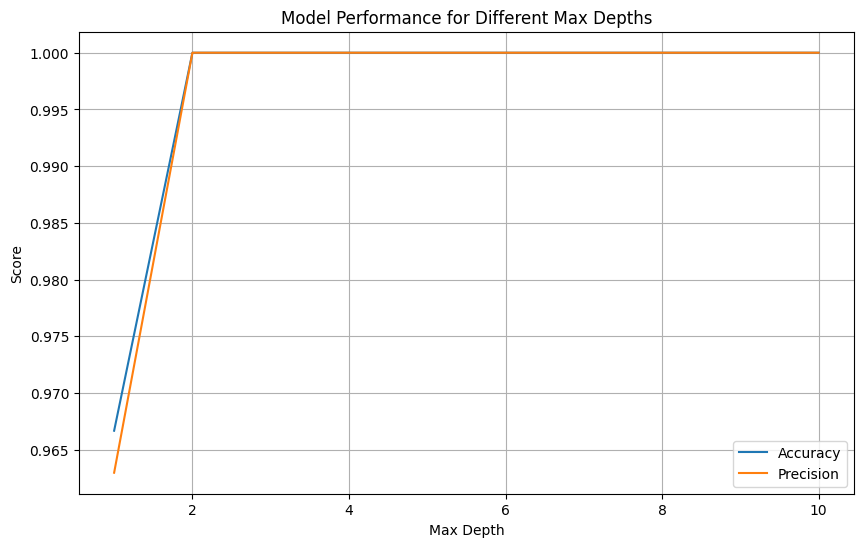

In [40]:
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_scores = []
precision_scores = []

for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train.values.tolist(), Y_train.values.tolist())
    y_pred = model.predict(X_test.values.tolist())
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='macro')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

plt.figure(figsize=(10, 6))
plt.plot(depth_values, accuracy_scores, label='Accuracy')
plt.plot(depth_values, precision_scores, label='Precision')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Model Performance for Different Max Depths')
plt.legend()
plt.grid(True)
plt.show()